<a href="https://colab.research.google.com/github/maxxx580/kaggle-salary-analysis/blob/master/kaggle_survey_salay_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary Prediction
Zixiang Ma MIE MENG 

In [0]:
!pip install plotly

In [0]:
import numpy as np
import pandas as pd

df_survey = pd.read_csv('kaggle_salary.csv')
df_survey.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,3,9,11,13,22,24,25,26,27,28,29,45,57,65,84,86,88,108,110,124,126,151,195,209,224,250,263,265,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,305,307,323,326,327,330,342,372,385,386,394,395) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
0,0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,NaN
1,2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0
2,3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,...,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.0
3,5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,...,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,2.0
4,7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,...,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1,3.0


## 1. Data Cleaning

- The dataset can be overall separated into to parts: **  'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10', 'Q12_MULTIPLE_CHOICE', 'Q17', 'Q18', 'Q23', 'Q24', 'Q25', 'Q26'** and the rest. The main difference is columns in the first part applies to everyone and there should not be any missing value. In contrast to that, columns in the second part contain value only when this question applies to the participants and missing value in this case in tolerated. Therefore, in the featurization process, they will be treated differently. 

- ** Part 1 missing value** : Q20, Q22, Q32, Q34, Q35, Q37, Q39, Q40, Q41,Q43, Q46 and Q48 contains significant portion of missing value according to figure 2. Existing data is insufficient to identify the most common value to replace the missing values. Therefore these column will be dropped (see function get_columns_to_drop_part2). Q5, Q8, Q10, Q12, Q17, Q18, Q23, Q24, Q25, and Q26 only contain small portion of missing value and they will be replaced with the most common data in their categories (see function encode_part1). 
 - Q5: Computer science (software engineering, etc.)
 - Q8: 0-1
 - Q10: We are exploring ML methods (and may one day put a model into production)
 - Q12: Local or hosted development environments (RStudio, JupyterLab, etc.)
 - Q17: Python
 - Q18: Python
 - Q23: 50% to 74% of my time
 - Q24: 1-2 years
 - Q25: < 1 year
 - Q26: Probably yes

-  There are two major encoding approach: one hot encoding and label encoding. One hot encoder creates a column for every category in categorical data and binary value is used to indicate if the category is selected. Label encoder assigns a unique numerical value to each category. 

- One hot encoding is used to convert  'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10', 'Q12_MULTIPLE_CHOICE', 'Q17', 'Q18', 'Q23', 'Q24', 'Q25', 'Q26', as these columns contain more than two categories and this approach can retain the correlation between features and target value regardless of orders. 
 

- The rest of the data frame is for multiple choice questions where participants only answer when the questions apply in their case. As a result of this, missing values are acceptable and they will be replaced with string N/A. All questions has been broken down into multiple columns and each column only contains one categoric. As cells only contains two possible value N/A or corresponding response for that column, they can be encoded into 0 and 1 by a label encoder. 

- The other text column for all questions are dropped as they are only counters, which is useless.

In [0]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

def get_columns_to_drop_part2():
  out = ['Q1', 'Q1_OTHER_TEXT', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',
         'Q6_OTHER_TEXT','Q7', 'Q7_OTHER_TEXT', 'Q8', 'Q10',
         'Q34_Part_1','Q34_Part_2','Q34_Part_3','Q34_Part_4','Q34_Part_5',
         'Q34_Part_6','Q35_Part_1', 'Q35_Part_1', 'Q35_Part_2', 'Q35_Part_3',
         'Q35_Part_4', 'Q35_Part_5', 'Q35_Part_6',
         'Time from Start to Finish (seconds)', 'Q12_MULTIPLE_CHOICE', 'Q17',
         'Q18', 'Q20', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q32', 'Q37', 'Q39_Part_1',
        'Q39_Part_2', 'Q40', 'Q41_Part_1', 'Q41_Part_2', 'Q41_Part_3', 'Q43', 
        'Q46', 'Q48', 'Q12_Part_1_TEXT', 'Q12_Part_2_TEXT', 'Q12_Part_3_TEXT',
        'Q12_Part_4_TEXT', 'Q12_Part_5_TEXT']
  
  wrong = ['Q23_OTHER_TEXT', 'Q24_OTHER_TEXT', 'Q25_OTHER_TEXT', 'Q26_OTHER_TEXT',
 'Q32_OTHER_TEXT', 'Q39_OTHER_TEXT', 'Q40_OTHER_TEXT', 'Q41_OTHER_TEXT',
 'Q43_OTHER_TEXT', 'Q44_OTHER_TEXT', 'Q45_OTHER_TEXT', 'Q46_OTHER_TEXT',
 'Q47_OTHER_TEXT', 'Q48_OTHER_TEXT']
  
  for i in range(11, 51):
    temp = 'Q%d_OTHER_TEXT' % i
    if temp not in wrong:
      out.append(temp)
  return out

def encode_part1(df):
  df['Q5'].fillna('Computer science (software engineering, etc.)', inplace=True)
  df['Q8'].fillna('0-1', inplace=True)
  df['Q10'].fillna('We are exploring ML methods (and may one day put a model into production)',
                   inplace=True)
  df['Q12_MULTIPLE_CHOICE'].fillna('Local or hosted development environments (RStudio, JupyterLab, etc.)',
                                   inplace=True)
  df['Q17'].fillna('Python',inplace=True)
  df['Q18'].fillna('Python',inplace=True)
  df['Q23'].fillna('50% to 74% of my time', inplace=True)
  df['Q24'].fillna('1-2 years', inplace=True)
  df['Q25'].fillna('< 1 year', inplace=True)
  df['Q26'].fillna('Probably yes', inplace=True)
  df = pd.concat([df, pd.get_dummies(df['Q1'])], axis=1)
  df = pd.concat([df, pd.get_dummies(df['Q2'])], axis=1)
  df = pd.concat([df, pd.get_dummies(df['Q3'])], axis=1)
  df = pd.concat([df, pd.get_dummies(df['Q4'])], axis=1)
  df = pd.concat([df, pd.get_dummies(df['Q5'])], axis=1)
  df = pd.concat([df, pd.get_dummies(df['Q6'])], axis=1)
  df = pd.concat([df, pd.get_dummies(df['Q7'])], axis=1)
  df = pd.concat([df, pd.get_dummies(df['Q8'])], axis=1)
  df = pd.concat([df, pd.get_dummies(df['Q10'])], axis=1)
  df = pd.concat([df, pd.get_dummies(df['Q12_MULTIPLE_CHOICE'])], axis=1)
  df = pd.concat([df, pd.get_dummies(df['Q17'])], axis=1)
  df = pd.concat([df, pd.get_dummies(df['Q18'])], axis=1)
  df = pd.concat([df, pd.get_dummies(df['Q23'])], axis=1)
  df = pd.concat([df, pd.get_dummies(df['Q24'])], axis=1)
  df = pd.concat([df, pd.get_dummies(df['Q25'])], axis=1)
  df = pd.concat([df, pd.get_dummies(df['Q26'])], axis=1)
  return df

def encode_part2_column(column):
  column = encoder.fit_transform(column.astype(str))
  return column

def featurize(df):
  
  y = df[['Q9']].copy()
  df = df.drop(['Q9'], axis=1)

  part1_features = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10',
                   'Q12_MULTIPLE_CHOICE', 'Q17', 'Q18', 'Q23',
                   'Q24', 'Q25', 'Q26']

  # categorical data
  x_part1 = df[part1_features].copy()
  x_part1 = encode_part1(x_part1)
  x_part1 = x_part1.drop(part1_features, axis=1)
  
  # part 1, part 2 and all other text columns are drop 
  x_part2 = df.drop(get_columns_to_drop_part2(), axis=1)
  x_part2.fillna('N/A', inplace=True)
  for col in x_part2.columns: 
    x_part2[col] = encode_part2_column(x_part2[col])

  return pd.concat([x_part1, x_part2], axis=1), y

def to_numerical(x, y):
  return pd.concat([x, y], axis=1)

## 2. Exploratory data analysis 

### Three Plots

#### Salary Distribution
Figure 1 shows the salary distribution. It is clear that most of salary data point is under $150,000 and specifically the benchmark salary for top 25% is 71742. This figures is useful to visualize the overall salary distribution across countries, professions, and etc. 

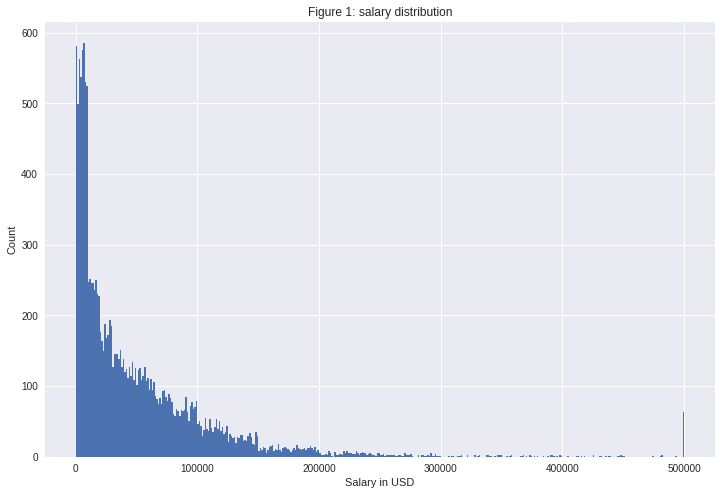

In [0]:
import matplotlib.pyplot as plt

df_survey_cleaned = df_survey.copy()
df_survey_cleaned.drop(0, inplace=True)
df_survey_cleaned.drop(['index'], axis=1, inplace=True)
df_survey_cleaned['Q9'] = df_survey_cleaned['Q9'].astype(np.float)
ax_arr = df_survey_cleaned.hist('Q9', bins=400, figsize=(12,8))
ax = ax_arr.flatten()[0] 
ax.set_title("Figure 1: salary distribution")
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Count')
plt.show()

In [0]:
df_survey_cleaned.Q9.describe()

count     15429.000000
mean      50624.790265
std       62272.396495
min           3.000000
25%        8694.000000
50%       29861.000000
75%       71742.000000
max      500000.000000
Name: Q9, dtype: float64

#### Missing Value in Categorical Data
Figure 2 shows the presence of missing value in required categorical data. Unlike other multiple choice questions, missing value is not acceptable in this case. This graph provides insight on how to handle missing value. 
- Because Q5, Q8, Q10, Q12, Q17, Q18, Q23, Q24, Q25, and Q26 only contain small amount of missing value, they can be replaced with the most common value in their columns listed below figure 2
 - Q5: Computer science (software engineering, etc.)
 - Q8: 0-1
 - Q10: We are exploring ML methods (and may one day put a model into production)
 - Q12: Local or hosted development environments (RStudio, JupyterLab, etc.)
 - Q17: Python
 - Q18: Python
 - Q23: 50% to 74% of my time
 - Q24: 1-2 years
 - Q25: < 1 year
 - Q26: Probably yes
- Q20, Q22, Q32, Q34, Q35, Q37, Q39, Q40, Q41,Q43, Q46 and Q48 in contrast contains significant portion of missing value, and therefore replacing them with common value provides little value. They will be excluded from feature engineering. 

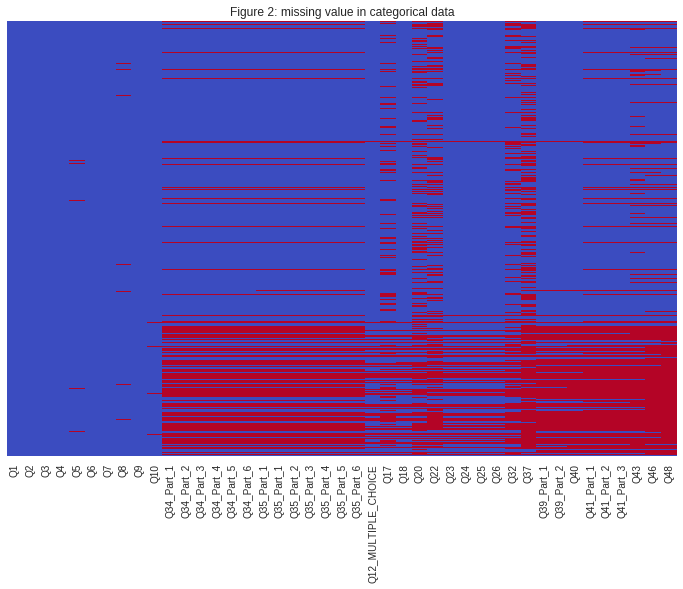

In [0]:
import seaborn as sns
df_categorical = df_survey_cleaned[['Q1','Q2','Q3', 'Q4','Q5', 'Q6', 'Q7',
                                    'Q8','Q9','Q10','Q34_Part_1','Q34_Part_2',
                                    'Q34_Part_3','Q34_Part_4','Q34_Part_5',
                                    'Q34_Part_6', 'Q35_Part_1', 'Q35_Part_1',
                                    'Q35_Part_2', 'Q35_Part_3', 'Q35_Part_4',
                                    'Q35_Part_5','Q35_Part_6','Q12_MULTIPLE_CHOICE',
                                    'Q17', 'Q18', 'Q20', 'Q22', 'Q23',
                                    'Q24', 'Q25', 'Q26', 'Q32', 'Q37', 'Q39_Part_1',
                                    'Q39_Part_2', 'Q40', 'Q41_Part_1', 'Q41_Part_2',
                                    'Q41_Part_3', 'Q43', 'Q46', 'Q48']].copy()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_categorical.isnull(), cmap='coolwarm',
            yticklabels=False, cbar=False, ax=ax)
ax.set_title('Figure 2: missing value in categorical data')
plt.show()

In [0]:
df_survey_cleaned.Q5.value_counts()

Computer science (software engineering, etc.)                    5937
Engineering (non-computer focused)                               2469
Mathematics or statistics                                        2074
A business discipline (accounting, economics, finance, etc.)     1290
Physics or astronomy                                              843
Information technology, networking, or system administration      642
Medical or life sciences (biology, chemistry, medicine, etc.)     615
Other                                                             499
Social sciences (anthropology, psychology, sociology, etc.)       413
Humanities (history, literature, philosophy, etc.)                210
Environmental science or geology                                  175
I never declared a major                                           68
Fine arts or performing arts                                       59
Name: Q5, dtype: int64

In [0]:
df_survey_cleaned.Q8.value_counts()

0-1      3879
1-2      2826
5-10     1973
2-3      1965
3-4      1308
4-5      1145
10-15    1123
15-20     595
20-25     271
30 +      144
25-30     124
Name: Q8, dtype: int64

In [0]:
df_survey_cleaned.Q10.value_counts()

We are exploring ML methods (and may one day put a model into production)                    3465
No (we do not use ML methods)                                                                3385
We recently started using ML methods (i.e., models in production for less than 2 years)      3006
We have well established ML methods (i.e., models in production for more than 2 years)       2255
We use ML methods for generating insights (but do not put working models into production)    1638
I do not know                                                                                1388
Name: Q10, dtype: int64

In [0]:
df_survey_cleaned.Q12_MULTIPLE_CHOICE.value_counts()

Local or hosted development environments (RStudio, JupyterLab, etc.)    6935
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       2692
Other                                                                   1246
Advanced statistical software (SPSS, SAS, etc.)                         1079
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                1020
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)     885
Name: Q12_MULTIPLE_CHOICE, dtype: int64

In [0]:
df_survey_cleaned.Q17.value_counts()

Python                   5866
R                        1526
SQL                       999
Java                      623
C/C++                     464
C#/.NET                   329
Javascript/Typescript     308
MATLAB                    247
SAS/STATA                 179
PHP                       149
Visual Basic/VBA           95
Other                      93
Scala                      81
Bash                       45
Ruby                       42
Go                         35
Julia                       7
Name: Q17, dtype: int64

In [0]:
df_survey_cleaned.Q18.value_counts()

Python        10279
R              1743
SQL             711
C++             206
MATLAB          165
Other           118
Java            114
None             82
Scala            52
Javascript       47
SAS              46
VBA              27
Go               17
Name: Q18, dtype: int64

In [0]:
df_survey_cleaned.Q23.value_counts()

50% to 74% of my time    4036
25% to 49% of my time    3571
1% to 25% of my time     3013
75% to 99% of my time    2141
0% of my time             360
100% of my time           340
Name: Q23, dtype: int64

In [0]:
df_survey_cleaned.Q24.value_counts()

1-2 years                                               3785
3-5 years                                               3161
< 1 year                                                2927
5-10 years                                              1781
10-20 years                                              902
I have never written code but I want to learn            493
20-30 years                                              239
30-40 years                                               85
40+ years                                                 42
I have never written code and I do not want to learn      26
Name: Q24, dtype: int64

In [0]:
df_survey_cleaned.Q25.value_counts()

< 1 year                                                                 4194
1-2 years                                                                3574
2-3 years                                                                1664
I have never studied machine learning but plan to learn in the future    1225
3-4 years                                                                 921
5-10 years                                                                743
4-5 years                                                                 650
10-15 years                                                               256
20+ years                                                                 129
I have never studied machine learning and I do not plan to                 59
Name: Q25, dtype: int64

In [0]:
df_survey_cleaned.Q26.value_counts()

Probably yes      3595
Definitely yes    3566
Maybe             2869
Probably not      2231
Definitely not    1145
Name: Q26, dtype: int64

#### Survey Time Consumption vs Salary
The figure 3 below plots the relationship between salary and the amount of time each participant spent on the survey. As the data is not part of the response but meta data from the survey, I would like to determine if there are correlation that can be leveraged to predict the salary. As it is shown below, participants who spent less time have a wide range of salary while for those people spent more time on the survey tends to have a lower salary. There is no obvious linear relation between salary and time consumption and there fore it will be excluded from features. 

In [0]:
df_survey_cleaned['Time from Start to Finish (seconds)'] =\
df_survey_cleaned['Time from Start to Finish (seconds)'].astype(int)
df_survey_cleaned['Time from Start to Finish (seconds)'].describe()

count     15429.000000
mean      13026.314862
std       48652.354414
min          54.000000
25%         731.000000
50%        1123.000000
75%        2046.000000
max      595857.000000
Name: Time from Start to Finish (seconds), dtype: float64

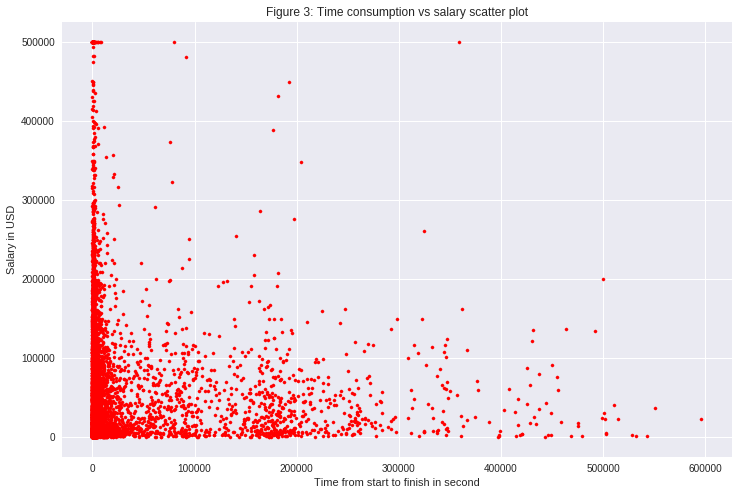

In [0]:
ax = df_survey_cleaned.plot.scatter(x='Time from Start to Finish (seconds)',
                                        y='Q9', c='r', figsize=(12,8), s=10)

ax.set_title("Figure 3: Time consumption vs salary scatter plot")
ax.set_xlabel('Time from start to finish in second')
ax.set_ylabel('Salary in USD')
plt.show()

### Feature correlation
This heat map presents the correlation among the features. Red color indicates a positive correlation while blue color mean negative one. The shade of the color shows the strength of the correlation. It is expected the raw features at this stage has high internal correlation. As a results of one hot encoding, features such as Male is highly correlated to female. These redundant features will be removed during feature selection and dimension reduction. 

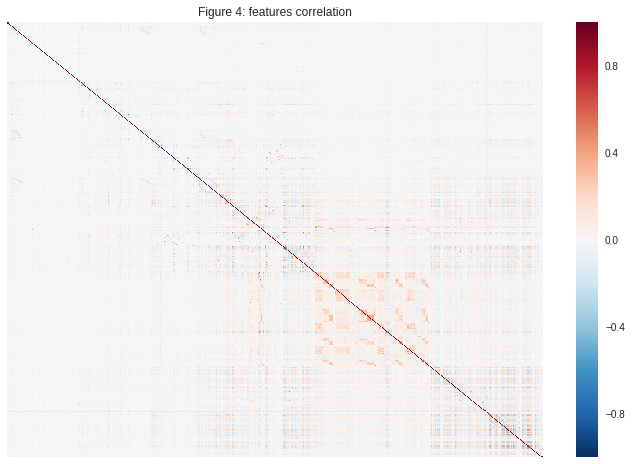

Correlation for Q6 I am a student and Q7 Student:  0.6953970258680384


In [0]:
x, y = featurize(df_survey_cleaned)
corr = x.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, yticklabels=False, xticklabels=False,
           ax = ax)
ax.set_title('Figure 4: features correlation')
plt.show()
print('Correlation for Q6 I am a student and Q7 Student: ',
      corr['I am a student']['Student']) #Q6 and Q7

The top 10 most important features are printed below with their correlation to target variable (salary). The most important feature is if a person is located in the United States, followed by being a student. 

In [0]:
df_numerical = to_numerical(x, y)
q9_corr = df_numerical.corr()['Q9']
q9_corr = q9_corr.apply(np.absolute).sort_values(ascending=False)
print(q9_corr[1:11])

United States of America                                                                  0.405404
Student                                                                                   0.278701
I am a student                                                                            0.253085
We have well established ML methods (i.e., models in production for more than 2 years)    0.213962
10-20 years                                                                               0.211151
22-24                                                                                     0.209508
Q15_Part_2                                                                                0.208550
Q27_Part_1                                                                                0.203035
Q11_Part_4                                                                                0.192405
India                                                                                     0.189282
Name: Q9, 

## 3. Feature Selection

### Recursive Feature Elimination
At this point there are over 500 features and some of them are less relevant predicting the target variable.  In the recursive feature elimination process, the estimator is train with the initial set of features. The least important feature is determined by regression coefficients and least important feature is eliminated. This process will be recursively repeated until all possible options are exhausted and optimal solution is found, which is the reason I choose to use it in this case. 

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
estimator = Ridge(alpha=1, normalize=False, random_state=0)
selector = RFE(estimator)
x_selected = selector.fit_transform(x, y)
x_selected.shape

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(15429, 268)

### Principle Component Analysis
Principle component analysis (PCA) is a  orthogonal transformation that convert a set of correlated variables into a set of linear unrelated variable. It uses variance to determine principle features, which ensures minimum information lost. 247 feature is selected after recursive feature elimination, it can be further reduced by PCA. Figure 5 shows the number of features vs accumulative variance and 217 feature is produced after dimension reduction while retaining 95% of features' variance. Features are scaled to ensure PCA performs correctly. 

In [0]:
# reference: https://plot.ly/ipython-notebooks/principal-component-analysis/
from sklearn.preprocessing import StandardScaler
import plotly.plotly as py

x_std = StandardScaler().fit_transform(x_selected)
cov_mat = np.cov(x_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
u,s,v = np.linalg.svd(x_std.T)

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0])
eig_pairs.reverse()

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

cnt = 0
for c in cum_var_exp:
  cnt += 1
  if c >= 95:
    break

print('%i out of %i features required to get to retain 95%% of covariance:' % (cnt, len(cum_var_exp)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



234 out of 268 features required to get to retain 95% of covariance:


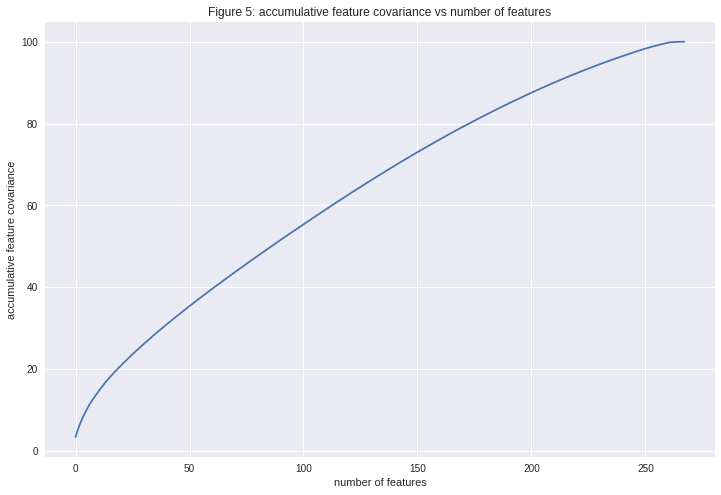

In [0]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()

x = range(len(eig_pairs)) 
ax.plot(x, cum_var_exp);
ax.set_title('Figure 5: accumulative feature covariance vs number of features')
ax.set_xlabel('number of features')
ax.set_ylabel('accumulative feature covariance')
plt.show()

In [0]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=cnt)
x_pca = sklearn_pca.fit_transform(x_std)

The figure 6 below shows the features' correlation with each other. In contrast to figure  4, most highly correlated features has been removed. as there is no visible dot in blue nor red.  

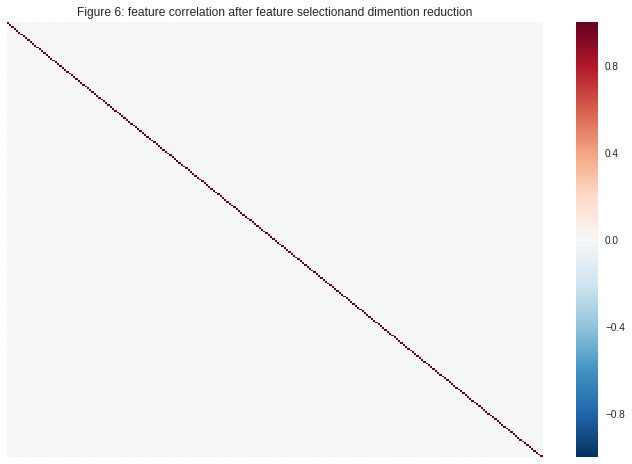

In [0]:
corr = pd.DataFrame(data=x_pca,
          columns=np.array(range(1, cnt+1))).corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, yticklabels=False, xticklabels=False,
           ax=ax)
ax.set_title('Figure 6: feature correlation after feature selection'
             +'and dimention reduction')
plt.show()

## 4. Model Implementation

In [0]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

def run_kfold(model, x, y):
    X = pd.DataFrame(data=x)
    Y = pd.DataFrame(data=y)
    kf = KFold(n_splits=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        Y_train, Y_test = Y.values[train_index], Y.values[test_index]

        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)

        accuracy = r2_score(Y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))   

    mean_outcome = np.mean(outcomes)
    std_outcome=np.std(outcomes)
    print("Mean r2: {0}".format(mean_outcome)) 
    print("Standard Deviation: {0}".format(std_outcome))
    return model.fit(x, y)

def get_variance(y_pred):
  return np.var(y_pred)

def get_bias(y, y_pred):
  return np.sqrt(np.mean((np.mean(y_pred)- y.values) ** 2))

def get_total_error(var, bia):
  e = []
  for v, b in zip(var, bia):
    e.append(b ** 2 + v)
  return e  

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.33, random_state=42)

### Ordinary Least Squares Regression
The first model I implement is the ordinary least square regression because it is the most basic regression model. The optimization goal is to minimize residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation. The major drawback of this model is a high likelihood of overfitting. Across 10 folds most accuracy is between 0.4 and 0.5. The mean accuracy of this model is  0.46 and standard deviation is 0.0398. 

In [0]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error

metrics = {'variance':[], 'bias':[]}

reg_lr = run_kfold(LinearRegression(), x_train, y_train)
predictions = reg_lr.predict(x_test)
predictions_train = reg_lr.predict(x_train)
error_test = mean_absolute_error(y_test, predictions)
error_train = mean_absolute_error(predictions_train, y_train)
metrics['bias'].append(get_bias(y_test, predictions))
metrics['variance'].append(get_variance(predictions))

Fold 1 accuracy: 0.453250885433897
Fold 2 accuracy: 0.4418171838649154
Fold 3 accuracy: 0.4894500637330048
Fold 4 accuracy: 0.4487939117735762
Fold 5 accuracy: 0.43195938071693285
Fold 6 accuracy: 0.5140633370022264
Fold 7 accuracy: 0.5277049689659316
Fold 8 accuracy: 0.3827224466740812
Fold 9 accuracy: 0.44872661366868305
Fold 10 accuracy: 0.4710283687471193
Mean r2: 0.4609517160580368
Standard Deviation: 0.03984169718724797


### Ridge Regression
I choose ridge regression as the second model to implement because it is closely related to the ordinary least squares regression. Like the least squares regression, ridge regression also calculate the sum of squares error between prediction and target variable, and it also has a regularization term, which is the regularization coefficient multiplied by slope squared. Large slope indicates the output is sensitive to the input, and by penalizing high sensitivity this could results in a well-generalized model (less overfitting). One major advantage is ridge regression will reduce the impact of highly correlated features, and on the other hand the disadvantage is the ridge regression does not perform feature selection.  Across 10 folds most accuracy is between 0.4 and 0.5. The mean accuracy of this model is 0.46 and standard deviation is 0.039. 

In [0]:
reg_rg = run_kfold(Ridge(random_state=0), x_train, y_train)
predictions = reg_rg.predict(x_test)
predictions_train = reg_rg.predict(x_train)
error_test = mean_absolute_error(predictions, y_test)
error_train = mean_absolute_error(predictions_train, y_train)
metrics['bias'].append(get_bias(y_test, predictions))
metrics['variance'].append(get_variance(predictions))

Fold 1 accuracy: 0.45324962269027314
Fold 2 accuracy: 0.4418238293278328
Fold 3 accuracy: 0.48945042974132713
Fold 4 accuracy: 0.44879069687191797
Fold 5 accuracy: 0.43196237732224707
Fold 6 accuracy: 0.5140683919243414
Fold 7 accuracy: 0.527716128151564
Fold 8 accuracy: 0.38273506868180873
Fold 9 accuracy: 0.44873261017517907
Fold 10 accuracy: 0.47103831937519935
Mean r2: 0.46095674742616904
Standard Deviation: 0.039841441852121955


### Lasso Regression
The reason for me to select lasso regression as it is another derivation of ordinary least square regression and it is similar to ridge regression. Unlike ridge regression, it uses regularization coefficient multiplied by absolute value of slope as regularization term. This method can exclude redundant correlated features by setting the feature weight to zero. The major drawback of lasso regression is the maximum number of feature selected is limited by the size of dataset. This is a concern when dataset is small but with large number of features. Across 10 folds, accuracy is ranging between 0.4 and 0.5 with mean of 0.46 and standard deviation of 0.0398. 

In [0]:
reg_las = run_kfold(Lasso(random_state=0), x_train, y_train)
predictions = reg_las.predict(x_test)
predictions_train = reg_las.predict(x_train)
error_test = mean_absolute_error(predictions, y_test)
error_train = mean_absolute_error(predictions_train, y_train)
metrics['bias'].append(get_bias(y_test, predictions))
metrics['variance'].append(get_variance(predictions))

Fold 1 accuracy: 0.4532568896848632
Fold 2 accuracy: 0.44185215299691594
Fold 3 accuracy: 0.48944810248186565
Fold 4 accuracy: 0.44878482914088536
Fold 5 accuracy: 0.4319662741564858
Fold 6 accuracy: 0.5140944830318068
Fold 7 accuracy: 0.5277588918864525
Fold 8 accuracy: 0.3827830712176252
Fold 9 accuracy: 0.44873174559744355
Fold 10 accuracy: 0.47109013280176903
Mean r2: 0.46097665729961135
Standard Deviation: 0.03984223273386403


### Elastic Net Regression
I choose to train a elastic net regression because it is the hybrid of ridge and lasso regression. It has two regularization term: one from lasso regression and one from ridge regression. Consequently, elastic net regression is able to handle highly correlated features like ridge, and able to remove useless features as lasso regression. Because of the additional term, this model is more computationally expensive, which is an disadvantage comparing to lasso or ridge regression. Across 10 folds, accuracy is ranging between 0.4 and 0.5 with mean of 0.45 and standard deviation of 0.0391. 

In [0]:
from sklearn.linear_model import ElasticNet
reg_en = run_kfold(ElasticNet(random_state=0), x_train, y_train)
predictions = reg_en.predict(x_test)
predictions_train = reg_en.predict(x_train)
error_test = mean_absolute_error(predictions, y_test)
error_train = mean_absolute_error(predictions_train, y_train)
metrics['bias'].append(get_bias(y_test, predictions))
metrics['variance'].append(get_variance(predictions))

Fold 1 accuracy: 0.4293317688104751
Fold 2 accuracy: 0.44044456673927124
Fold 3 accuracy: 0.4650631705953501
Fold 4 accuracy: 0.41925228992851415
Fold 5 accuracy: 0.42165122945993616
Fold 6 accuracy: 0.5027727174053193
Fold 7 accuracy: 0.5325723426945244
Fold 8 accuracy: 0.3981642042424455
Fold 9 accuracy: 0.44362746681236975
Fold 10 accuracy: 0.4739079500122796
Mean r2: 0.4526787706700485
Standard Deviation: 0.03914715569702913


### Bias Variance Trade off
From a variance-bias trade off perspective, all four model perform similarly on bias around 63271 (see figure 8 below), but variance of the elastic net model is dramatically lower than the other three.  The variance of elastic net regression model is 1297675213 while the rest three is around 1896367099. This is mainly attributed to the hybrid regularization in elastic net model. Overall from a bias and variance trade-off perspective, elastic net regression performs the best with lowest total error among four models according to figure 9. 

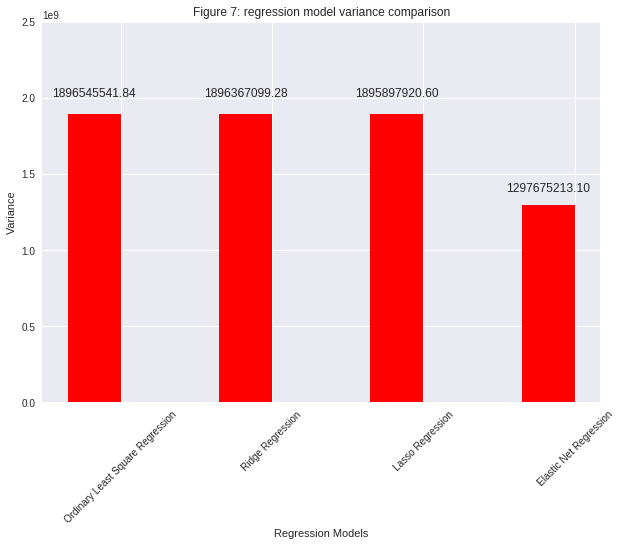

In [0]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.2f' % float(height),
                ha='center', va='bottom')

ind = np.arange(4)
width = 0.35

fig, ax = plt.subplots(figsize=(10,7))
p1 = ax.bar(ind,metrics['variance'],width,color='r')
ax.set_title('Figure 7: regression model variance comparison')
ax.set_xlabel('Regression Models')
ax.set_ylabel('Variance')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['Ordinary Least Square Regression', 'Ridge Regression',\
                    'Lasso Regression', 'Elastic Net Regression'])
ax.set_ylim(0,2500000000)
plt.xticks(rotation=45)
autolabel(p1)
plt.show()

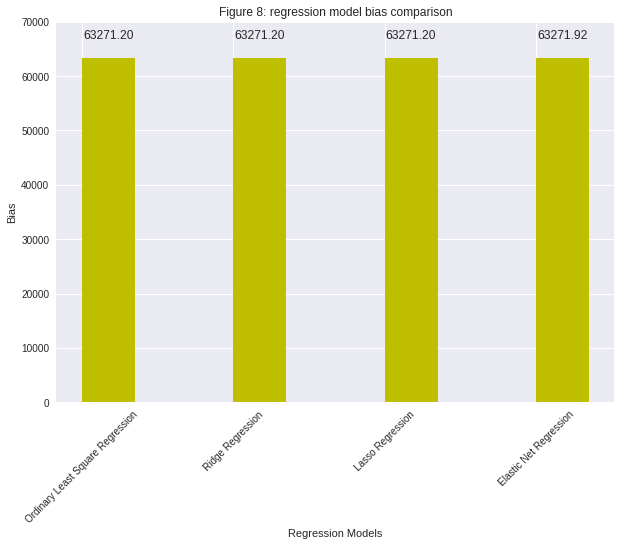

In [0]:
fig, ax = plt.subplots(figsize=(10,7))
p2 = ax.bar(ind+width,metrics['bias'],width,color='y')
ax.set_title('Figure 8: regression model bias comparison')
ax.set_xlabel('Regression Models')
ax.set_ylabel('Bias')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['Ordinary Least Square Regression', 'Ridge Regression',\
                    'Lasso Regression', 'Elastic Net Regression'])
plt.xticks(rotation=45)
ax.set_ylim(0,70000)
autolabel(p2)
plt.show()

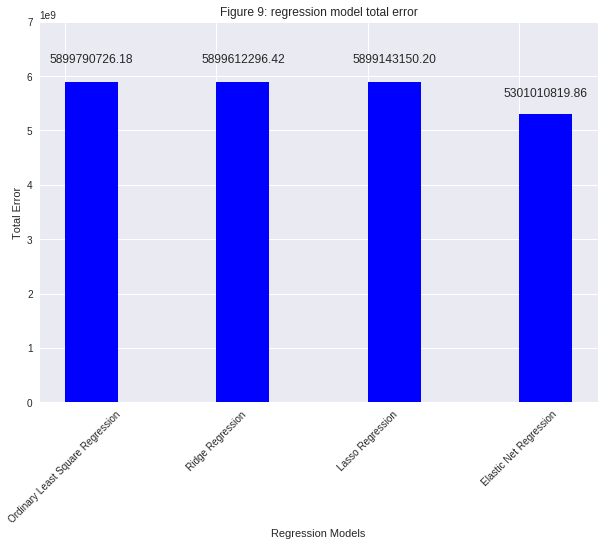

In [0]:
fig, ax = plt.subplots(figsize=(10,7))
p3 = ax.bar(ind+width,get_total_error(metrics['variance'], metrics['bias']),width,color='b')
ax.set_title('Figure 9: regression model total error')
ax.set_xlabel('Regression Models')
ax.set_ylabel('Total Error')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['Ordinary Least Square Regression', 'Ridge Regression',\
                    'Lasso Regression', 'Elastic Net Regression'])
plt.xticks(rotation=45)
ax.set_ylim(0,7000000000)
autolabel(p3)
plt.show()

## 5. Model Tuning
This section apply grid search on all four models to find the hyperparameters to optimize the performance. To avoid excessive  time consumption, this section is only ran once and the output is added as comment at bottom of each cells. To be consistent, r2 score is used as the metric is grid search. 

### Grid Search for Ordinary Least Square Regression
As the ordinary least square regression doesn't have regularization, the grid search will only explore the fit_intercept and normalization option. The parameter fit_intercept indicates if the intercept on the regression model will be calculated. The parameter normalize indicates if normalization will be perform on features before fitting the model, and if fit_intercept is false, normalize parameter will be ignored. 

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {'fit_intercept':[True, False],
             'normalize':[True, False]} 
acc_scorer_lm = make_scorer(r2_score)

grid = GridSearchCV(reg_lr, param_grid, cv = 5, scoring = acc_scorer_lm)
# grid.fit(x_train, y_train)

# print('The highest score achived on cross validation is %f.' % grid.best_score_)
# print(grid.best_params_)

# Output:
# The highest score achived on cross validation is 0.455557.
# {'fit_intercept': True, 'normalize': True}

### Grid Search for Ridge Regression
The normalize parameter have the same effect on rigdge regression as on ordinary least square regression. The ridge regression also has the alpha parameter for regularization and multiple solvers availible for optimization. 

In [0]:
param_grid = {'alpha':[0.01, 0.1, 1, 10, 100],
             'normalize':[True, False], 
             'solver':['svd', 'cholesky', 'sparse_cg', 'lsqr', 'sag']} 
acc_scorer_lm = make_scorer(r2_score)

grid = GridSearchCV(reg_rg, param_grid, cv = 5, scoring = acc_scorer_lm)
# grid.fit(x_train, y_train)

# print('The highest score achived on cross validation is %f.'% (grid.best_score_))
# print(grid.best_params_)

# Output: 
# The highest score achived on cross validation is 0.456277.
# {'alpha': 100, 'normalize': False, 'solver': 'lsqr'}

### Grid Search for Lasso Regression
Parameters alpha and normalize also apply the same effect on lasso regression. In addition, a selection parameter to control how coefficients are updated. 

In [0]:
param_grid = {'alpha':[0.01, 0.1, 1, 10, 100],
             'normalize':[True, False],
             'selection':['cyclic','random']} 
acc_scorer_lm = make_scorer(r2_score)

grid = GridSearchCV(reg_las, param_grid, cv = 5, scoring = acc_scorer_lm)
# grid.fit(x_train, y_train)

# print('The highest score achived on cross validation is %f.' % (grid.best_score_))
# print(grid.best_params_)

# Output:
# The highest score achived on cross validation is 0.452873.
# {'alpha': 100, 'normalize': False, 'selection': 'random'}

### Grid Search for Elastic Net Regression
 The alpha, fit_intercept, normalize, positive, and selection parameters are tested on elastic search, and they work the same way on this model. l1_ratio is the penalty mixing parameter. zero l1_ratio means L2 penalty and one l1_ratio means L1 penalty. Value between zero and one results in combination of both L1 and L2. 

In [0]:
param_grid = {'alpha':[0.01, 0.1, 1, 10, 100],
             'normalize':[True, False],
             'selection':['cyclic','random'],
             'l1_ratio':[0, 0.5, 1]} 
acc_scorer_lm = make_scorer(r2_score)

grid = GridSearchCV(reg_en, param_grid, cv=5, scoring=acc_scorer_lm)
# grid.fit(x_train, y_train)

# print('The highest score achived on cross validation is %f.' % (grid.best_score_))
# print(grid.best_params_)

# Output:
# The highest score achived on cross validation is 0.458554.
# {'alpha': 0.1, 'l1_ratio': 0, 'normalize': False, 'selection': 'cyclic'}

### Grid Search Result

All four model perform with similar R2 score, but elastic net regression out-performs the rest with small margin with R2 score 0.0.458554. This outcome is expected as Elastic Net regression combines the advantage of lasso and ridge. Elastic Net regression will be used in the model test phase. 

## 6. Model Testing

### Test Elastic Net Regression
- The elastic net regression model is trained with the parameters from the previous step. The result is visualized in figure 8, it is evident that the prediction made by elastic net regression is mostly below $150,000. This model doesn't perform well in high salary range. 
- The R2 score on train set is 0.495540 and it is 0.424611 on test set, and the squared error is slightly higher on test set than train set (25184 on train set and 26485 on test set). The pattern of higher error on test set indicates a sign of overfitting, as the regression model fails to generalize the error in the train set. 
- To correct the overfitting and improve the model, more value of alpha should be tested in grid search in order to further regularize the fitting process. Secondly more possible value of l1_ratio should also be tested. Current gird search only exhausts three value 0, 0.5 and 1. Zero l1_ratio (L2 penalty) resulted in a better outcome. With other mixing option like 0.3 or 07 can be tested when L1 penalty is enabled and this can potentially improve the model performance on test set. Increase the maximum number of iteration can also give the model more room to converge and results in higher accuracy. 

In [0]:
# {'alpha': 0.1, 'l1_ratio': 0, 'normalize': False, 'selection': 'cyclic'}
reg_las = ElasticNet(fit_intercept=True, normalize=False,
                     positive=False, selection='cyclic',
                     alpha=0.1, l1_ratio=0, max_iter=10000)

reg_las.fit(x_train, y_train)
predictions_test = reg_las.predict(x_test)
predictions_train = reg_las.predict(x_train)

train_r2 = r2_score(y_train, predictions_train)
test_r2 = r2_score(y_test, predictions_test)

test_error = mean_absolute_error(y_test, predictions_test)
train_error = mean_absolute_error(y_train, predictions_train)

print('r2 score on train set is %f, and on test set is %f'%(train_r2, test_r2))
print('squared error score on train set is %f, and on test set is %f'%(train_error, test_error))

r2 score on train set is 0.495540, and on test set is 0.424611
squared error score on train set is 25184.857761, and on test set is 26485.289222


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



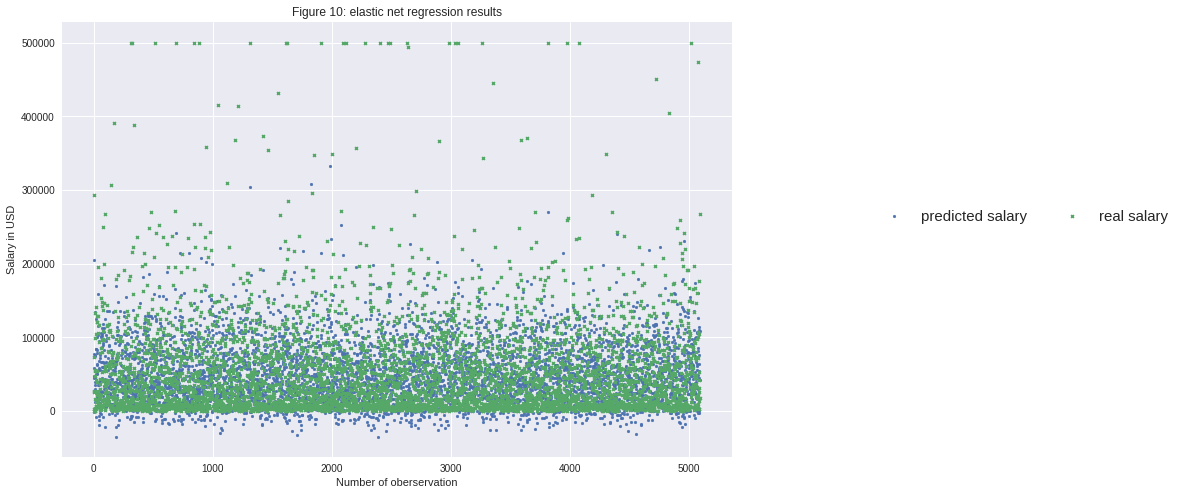

In [0]:
line = range(len(predictions_test))

fig, ax = plt.subplots(figsize=(12,8))
p1 = ax.scatter(line, predictions_test, s=8, marker='o')
p2 = ax.scatter(line, y_test, s=8, marker='x')

ax.set_title('Figure 10: elastic net regression results')
ax.grid(True)
ax.set_xlabel('Number of oberservation')
ax.set_ylabel('Salary in USD')


plt.legend([p1, p2], ['predicted salary', 'real salary'],
          bbox_to_anchor=(1.2,0.6), fontsize=15, ncol=3, scatterpoints=1)

plt.show()

## Bonus: Neutral Network

Multiplayer perceptron (MLP) is a class of feedforward artificial neutral network, and it uses back propogation as training method. MLP can be applied to both classification and regression problem, and in this case it will be used to predict salary based on the same features build in previous steps. The model will be train with different learning rate, hidden layers and activation function to determine how they effect the model overall. 

### Learning rate
There are three kinds of learning rate: constant, inverscaling, and adaptive. This parameter impacts how the weight is updated. Constant learning rates will make the model always use the learning_rate_init value. Inverscaling will gradually decrease the learning rate, and adaptive option only decrease learning when training loss goes up. To determine how learning rate effects the neutral network, a model is created with three different learning rate. With three different learning rate, the model results in the same outcome (there is no difference according to figure 11 to 13). The mean absolute error on train set is 7082.203185 and 46324.010059 on test set, which is also a sign of overfitting. 

invscaling train mean absolute error is 7082.203185 and test mean absolute erroris 46324.010059


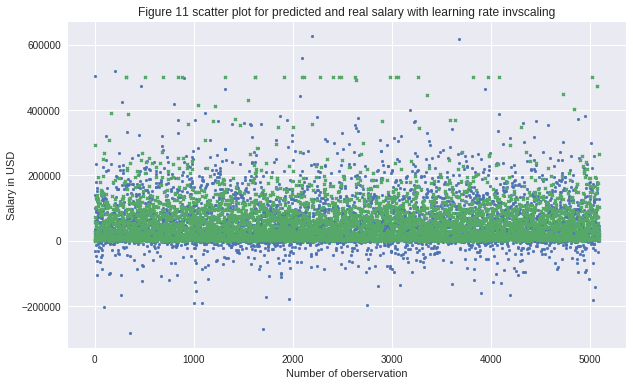

constant train mean absolute error is 7082.203185 and test mean absolute erroris 46324.010059


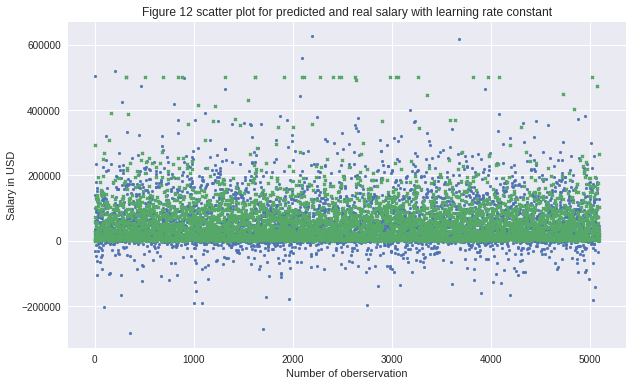

adaptive train mean absolute error is 7082.203185 and test mean absolute erroris 46324.010059


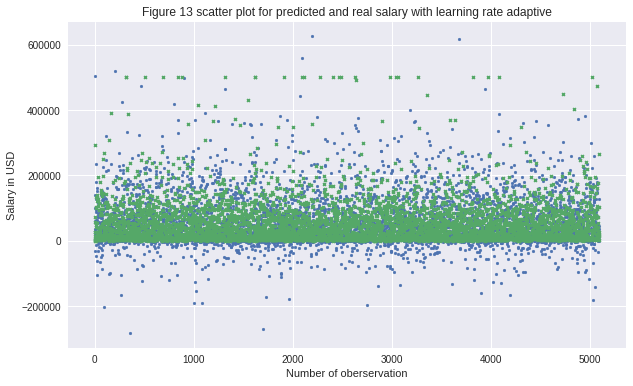

In [0]:
from sklearn.neural_network import MLPRegressor
for [index ,rate] in zip([11, 12, 13],['invscaling', 'constant', 'adaptive']):
  mlp_regressor = MLPRegressor(hidden_layer_sizes=(50,50),
                             random_state=0,
                             alpha=1,
                             solver='adam',
                             learning_rate=rate,
                             max_iter=3000)
  mlp_regressor.fit(x_train, y_train.values.ravel())
  predictions_test = mlp_regressor.predict(x_test)
  predictions_train = mlp_regressor.predict(x_train)
  error_test = mean_absolute_error(predictions_test, y_test.values.ravel())
  error_train = mean_absolute_error(predictions_train, y_train.values.ravel())
  print('%s train mean absolute error is %f and test mean absolute erroris %f' % (rate, error_train, error_test))
  
  line = range(len(predictions_test))

  fig, ax = plt.subplots(figsize=(10,6))
  p1 = ax.scatter(line, predictions_test, s=8, marker='o')
  p2 = ax.scatter(line, y_test, s=8, marker='x')
  ax.set_title('Figure %i scatter plot for predicted and real salary with learning rate %s' % (index, rate))
  ax.set_xlabel('Number of oberservation')
  ax.set_ylabel('Salary in USD')
  plt.show()

### Hidden layer sizes

Four different hidden layer with different number of node and layers. Different layer architecture has a dramatic impact on the model's performance. The measurement used in this case is mean absolute error. 
- Model of one layer of 50 nodes shows slights overfitting  with train error 20559.919887 and test error 25089.764888. Under this hidden layer, the MLP regressor performs better than the well-tuned elastic net regression model. 
- As the size the layer increases to 100, the model shows obvious sign of overfitting with train error 18914.158032 and test error 25911.252962. Comparing to the previous model, he performance declines as the size of layer increased. According to figure 15, the model made prediction that lower than zero. 
- A second hidden layer of 50 node is added to the model, and the model shows severe overfitting with train error of 7082.203185 and test error of 46324.010059. According to figure 16, the prediction is obviously deviated from the actual value. The overall performance dramatically declined as a second layer added. 
- Lastly the size of both layer is double from 50 to 100 nodes. The MLP regressor is still overfitting with train error 5443.304949 and test error 42696.179994. However, by doubling the size of all layers the the overfitting issue has been slightly corrected as the test error has decrease by 3627.830065 in contrast to layer [50, 50]. 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.



[50] train mean absolute error is 20559.919887 and test mean absolute erroris 25089.764888


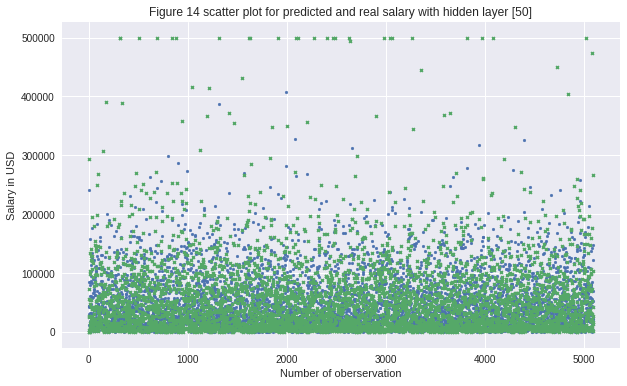

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.



[100] train mean absolute error is 18914.158032 and test mean absolute erroris 25911.252962


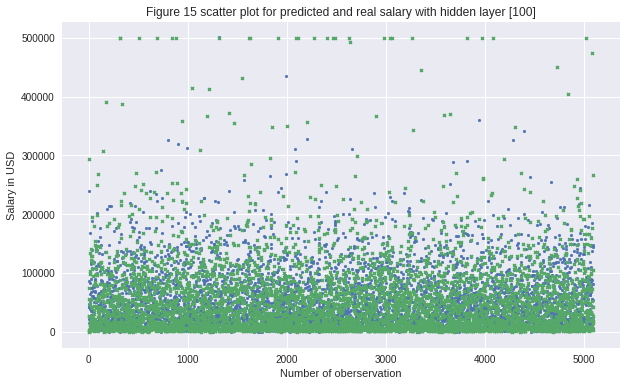

[50, 50] train mean absolute error is 7082.203185 and test mean absolute erroris 46324.010059


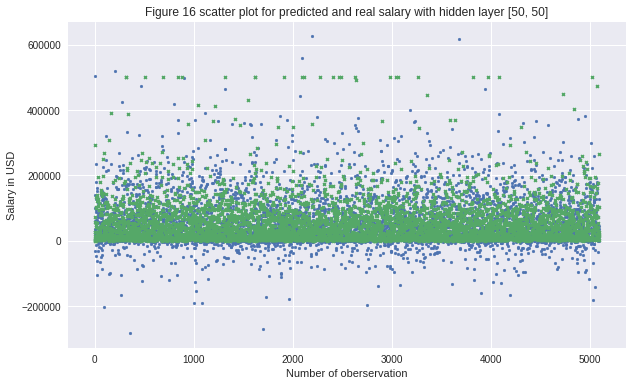

[100, 100] train mean absolute error is 5443.304949 and test mean absolute erroris 42696.179994


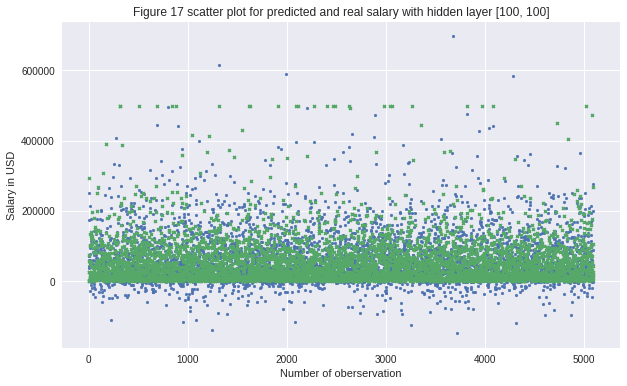

In [0]:
for [index, layer] in zip([14,15,16,17], [[50], [100], [50, 50], [100, 100]]):
  mlp_regressor = MLPRegressor(hidden_layer_sizes=layer,
                             random_state=0,
                             alpha=1,
                             solver='adam',
                             learning_rate='adaptive',
                             max_iter=5000)
  mlp_regressor.fit(x_train, y_train.values.ravel())
  predictions_test = mlp_regressor.predict(x_test)
  predictions_train = mlp_regressor.predict(x_train)
  error_test = mean_absolute_error(predictions_test, y_test.values.ravel())
  error_train = mean_absolute_error(predictions_train, y_train.values.ravel())
  print('%s train mean absolute error is %f and test mean absolute erroris %f' % (str(layer), error_train, error_test))
  
  line = range(len(predictions_test))

  fig, ax = plt.subplots(figsize=(10,6))
  p1 = ax.scatter(line, predictions_test, s=8, marker='o')
  p2 = ax.scatter(line, y_test, s=8, marker='x')
  ax.set_title('Figure %i scatter plot for predicted and real salary with hidden layer %s' % (index, str(layer)))
  ax.set_xlabel('Number of oberservation')
  ax.set_ylabel('Salary in USD')
  plt.show()

### MLP Summary
To sum up, the learning rate parameter has little influence on the MLP performance, and hidden layer on the other hand can dramatically change its performance. Overall, MLP regressor can out-perform all four linear regression models in respect of mean absolute error. MLP achieves train error of 20559.919887 and test error of 25089.764888. In contrast, the well-tuned elastic net regression achieves train error of 25184.857761 and test error of 26485.289222. However, it take much more time to train the MLP model than linear regression on the same train set. Hidden layers have various architectures, which makes the tuning process complicated. 